# UNPACKING DATASET

In [1]:
#import libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
#load data

df = pd.read_csv('shootings.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


# CLEANING DATA

In [3]:
#getting information about dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [4]:
df.shape

(4895, 15)

In [5]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [6]:
#checking for duplicates

df.duplicated().sum()

0

In [7]:
#checking for NaN values

df.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [8]:
#Making data readable

df['first_name'] = df['name'].apply(lambda x:x.split(' ')[0])
df['last_name'] = df['name'].apply(lambda x:x.split(' ')[1])

In [9]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,first_name,last_name
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,Tim,Elliot
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,Lewis,Lee
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,John,Paul
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,Matthew,Hoffman
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,Michael,Rodriguez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,Rayshard,Brooks
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,Caine,Van
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,Hannah,Fizer
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,William,Slyter


In [10]:
type(df['date'].iloc[0])

str

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
type(df['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df['year'] = df['date'].apply(lambda x:x.year)
df['month'] = df['date'].apply(lambda x:x.month)
df['day'] = df['date'].apply(lambda x:x.day)

In [14]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,first_name,last_name,year,month,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,Tim,Elliot,2015,1,2
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,Lewis,Lee,2015,1,2
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,John,Paul,2015,1,3
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,Matthew,Hoffman,2015,1,4
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,Michael,Rodriguez,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,Rayshard,Brooks,2020,6,12
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,Caine,Van,2020,6,12
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,Hannah,Fizer,2020,6,13
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,William,Slyter,2020,6,13


In [15]:
df.drop(columns = ['name', 'date'], inplace = True)

In [16]:
df

,id,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,first_name,last_name,year,month,day
0,3,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,Tim,Elliot,2015,1,2
1,4,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,Lewis,Lee,2015,1,2
2,5,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,John,Paul,2015,1,3
3,8,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,Matthew,Hoffman,2015,1,4
4,9,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,Michael,Rodriguez,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,Rayshard,Brooks,2020,6,12
4891,5925,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,Caine,Van,2020,6,12
4892,5918,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,Hannah,Fizer,2020,6,13
4893,5921,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,William,Slyter,2020,6,13


In [17]:
df.index

RangeIndex(start=0, stop=4895, step=1)

In [18]:
df

,id,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,first_name,last_name,year,month,day
0,3,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,Tim,Elliot,2015,1,2
1,4,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,Lewis,Lee,2015,1,2
2,5,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,John,Paul,2015,1,3
3,8,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,Matthew,Hoffman,2015,1,4
4,9,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,Michael,Rodriguez,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,Rayshard,Brooks,2020,6,12
4891,5925,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,Caine,Van,2020,6,12
4892,5918,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,Hannah,Fizer,2020,6,13
4893,5921,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,William,Slyter,2020,6,13


In [19]:
df.columns

Index(['id', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city',
       'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'arms_category', 'first_name', 'last_name', 'year',
       'month', 'day'],
      dtype='object')

In [20]:
colm =list(df.columns)
df = df[[colm[0]] + colm[-5:-3] + colm[3:8]+ colm[-3:] + colm[1:3] + [colm[-6]] + colm[8:12]]
df

,id,first_name,last_name,age,gender,race,city,state,year,month,day,manner_of_death,armed,arms_category,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim,Elliot,53.0,M,Asian,Shelton,WA,2015,1,2,shot,gun,Guns,True,attack,Not fleeing,False
1,4,Lewis,Lee,47.0,M,White,Aloha,OR,2015,1,2,shot,gun,Guns,False,attack,Not fleeing,False
2,5,John,Paul,23.0,M,Hispanic,Wichita,KS,2015,1,3,shot and Tasered,unarmed,Unarmed,False,other,Not fleeing,False
3,8,Matthew,Hoffman,32.0,M,White,San Francisco,CA,2015,1,4,shot,toy weapon,Other unusual objects,True,attack,Not fleeing,False
4,9,Michael,Rodriguez,39.0,M,Hispanic,Evans,CO,2015,1,4,shot,nail gun,Piercing objects,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard,Brooks,27.0,M,Black,Atlanta,GA,2020,6,12,shot,Taser,Electrical devices,False,attack,Foot,True
4891,5925,Caine,Van,23.0,M,Black,Crown Point,IN,2020,6,12,shot,gun,Guns,False,attack,Car,False
4892,5918,Hannah,Fizer,25.0,F,White,Sedalia,MO,2020,6,13,shot,unarmed,Unarmed,False,other,Not fleeing,False
4893,5921,William,Slyter,22.0,M,White,Kansas City,MO,2020,6,13,shot,gun,Guns,False,other,Other,False


# STATISTICAL DATA

In [21]:
Means = df.groupby('gender')['age'].mean()
Medians = df.groupby('gender')['age'].median()
Modes = df.groupby('gender')['age'].agg(lambda x: pd.Series.mode(x)[0])

In [22]:
Means

gender
F    37.019080
M    36.527453
Name: age, dtype: float64

In [23]:
Medians

gender
F    35.0
M    35.0
Name: age, dtype: float64

In [24]:
Modes

gender
F    25.0
M    31.0
Name: age, dtype: float64

In [25]:
df.groupby('gender')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,222.0,37.019080,12.569796,12.0,27.0,35.0,46.0,84.0
M,4673.0,36.527453,12.701136,6.0,27.0,35.0,45.0,91.0


Text(0.5, 1.0, 'Number of the killed male and female')

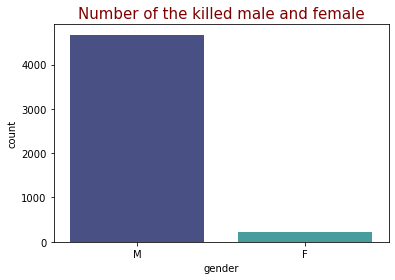

In [26]:
sns.countplot(x='gender', data=df, palette='mako')
plt.title('Number of the killed male and female',color = 'maroon',fontsize=15)

# NUMBER OF THE PEOPLE KILLED BY YEARS

In [27]:
df.groupby('year')['id'].count()

year
2015    965
2016    904
2017    906
2018    888
2019    858
2020    374
Name: id, dtype: int64

Text(0.5, 1.0, 'Number of the people killed by years')

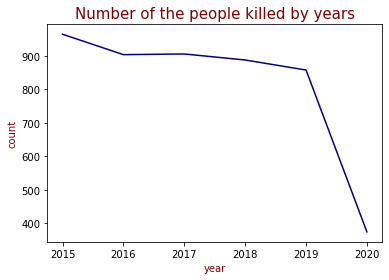

In [28]:
df.groupby('year')['id'].count().plot(color='navy')
plt.xlabel('year', color = 'maroon')
plt.ylabel('count', color = 'maroon')

plt.title('Number of the people killed by years',color = 'maroon',fontsize=15)

# 10 THE MOST DANGEROUS CITIES

In [29]:
dang_city = df['city'].value_counts().head(10)
dang_city 

Los Angeles     78
Phoenix         66
Houston         51
Las Vegas       41
San Antonio     40
Chicago         38
Columbus        36
Albuquerque     32
Jacksonville    31
St. Louis       30
Name: city, dtype: int64

In [30]:
dang_city.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Las Vegas', 'San Antonio',
       'Chicago', 'Columbus', 'Albuquerque', 'Jacksonville', 'St. Louis'],
      dtype='object')

In [31]:
dang_city.values

array([78, 66, 51, 41, 40, 38, 36, 32, 31, 30])

Text(0.5, 1.0, 'The most dangerous cities')

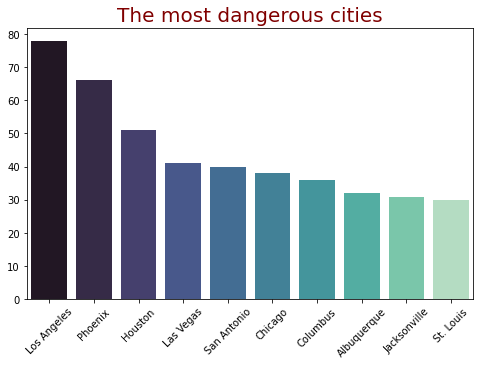

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.barplot(x=dang_city.index, y=dang_city.values, palette='mako')

ax.set_xticklabels(dang_city.index, rotation = 45)
ax.set_title('The most dangerous cities', color='maroon', fontsize=20)

# 20 THE MOST DANGEROUS STATES

In [33]:
dang_states = df['state'].value_counts().head(20)
dang_states

CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
TN    125
MO    124
LA    102
IL     99
PA     95
AL     95
NM     93
VA     92
IN     91
NY     90
Name: state, dtype: int64

Text(0.5, 1.0, 'The most dangerous states')

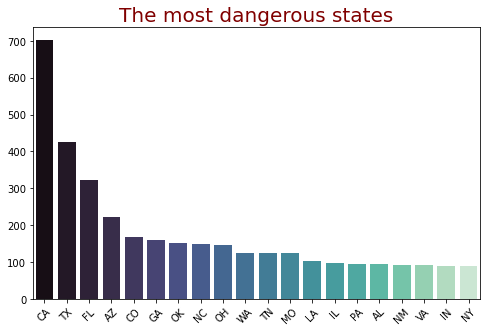

In [34]:
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.barplot(x=dang_states.index, y=dang_states.values, palette='mako')

ax.set_xticklabels(dang_states.index, rotation = 45)
ax.set_title('The most dangerous states', color='maroon', fontsize=20)

# RACE OF KILLED PEOPLE

In [35]:
df.groupby('race')['id'].count()

race
Asian         93
Black       1298
Hispanic     902
Native        78
Other         48
White       2476
Name: id, dtype: int64

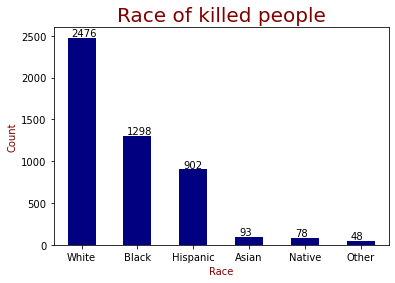

In [36]:
kill_race = df['race'].value_counts()

ax = kill_race.plot.bar(color='navy')
ax.set_xticklabels(kill_race.index, rotation = 0)
ax.set_xlabel ('Race', color = 'maroon')
ax.set_ylabel ('Count', color = 'maroon')
ax.set_title('Race of killed people',color = 'maroon',fontsize=20)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.07, p.get_height()+20))

Text(0.5, 1.0, 'Race of killed people by Years')

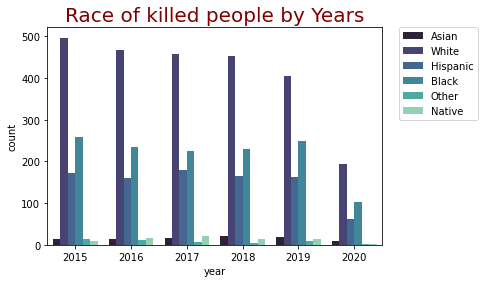

In [37]:
sns.countplot(x='year', data=df, hue='race', palette='mako')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Race of killed people by Years', color = 'maroon',fontsize=20)

# THE KILLED PEOPLE HAVING MENTAL-ILLNESS OR NOT

/Users/anastasiasevcik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


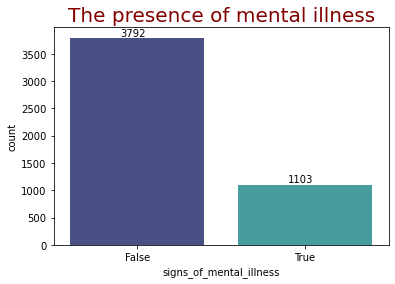

In [38]:
fig, ax = plt.subplots()

sns.countplot(df['signs_of_mental_illness'], palette='mako')
plt.title('The presence of mental illness',color = 'maroon',fontsize=20)

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+35))

In [39]:
df.groupby(['gender','signs_of_mental_illness'])['id'].count()

gender  signs_of_mental_illness
F       False                       153
        True                         69
M       False                      3639
        True                       1034
Name: id, dtype: int64

Text(0.5, 1.0, 'The presence of mental illness depending on gender')

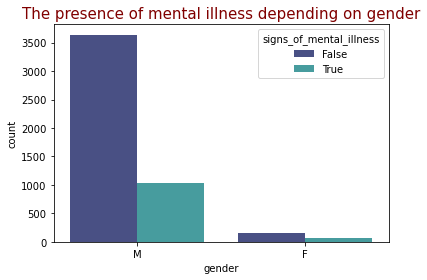

In [40]:
sns.countplot(x='gender', data=df, hue='signs_of_mental_illness', palette='mako')
plt.title('The presence of mental illness depending on gender',color = 'maroon',fontsize=15)

# THE MOST POPULAR WEAPONS USED TO KILL PEOPLE

In [41]:
df['arms_category'].value_counts()

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

In [42]:
types_of_the_weapons = df.armed.value_counts()[:7]
types_of_the_weapons

gun           2755
knife          708
unknown        418
unarmed        348
toy weapon     171
vehicle        120
machete         39
Name: armed, dtype: int64

Text(0.5, 1.0, 'The most popular weapons used to kill people')

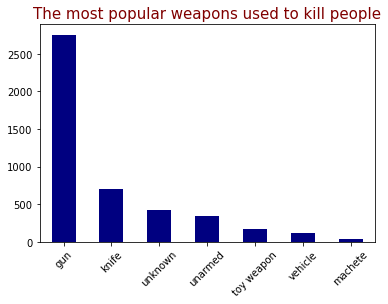

In [43]:
fig, ax = plt.subplots()
types_of_the_weapons.plot(kind='bar', color = 'navy')

ax.set_xticklabels(types_of_the_weapons.index, rotation = 45)
ax.set_title('The most popular weapons used to kill people', color = 'maroon', fontsize=15)